In [20]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt 
%matplotlib inline
plt.style.use('ggplot')
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

정확도는 직관적으로 모델 예측 성능을 평가하는 지표.

이진 분류의 경우 데이터의 구성에 따라 ML 모델의 성능을 왜곡할 수있기 때문에 정확도 수치 하나만 가지고 성능 평가하지 않는다.

불균형한 데이터 세트에 모든 데이터를 0으로 예측하는 clasifier을 이용하면 높은 예측 정확도를나타냄.

파무것도 하지 않고 무조건 특정한 결과로 찍어도   
데이터 분포도가 균일하지 않은 경우 높은 수치가 나타날 수 있는 것이 정확도 평가 지표의 맹점

# 정확도 평가 지표는 불균형한 레이블 데이터 세트에서는 성능 수치로 사용되어서는 안된다.

- 이러한 한계점을 극복하기 위해 다양한 분류지표와 함께 적용


## 오차행렬

- TN : 예측이 0 인데 실제값은 0  FP : 예측이 1 인데 실제값은 0
- FN : 예측이 1 인데 실제값은 1  TP : 예측이 0 인데 실제값은 1

정확도 = 예측 결과와 실제 값이 동일한 건수 / 전체 데이터 수  
(TN + TP) / (TN + FP + FN + TP)

정밀도 = TP / (FP + TP)  

- 스펨메일 여부 판단하는 모델
- 실제 positive인 스펨 메일을 Negative인 일반 메일로 분류하더라고 불편함을 느끼는 정도지만
실제 Neagetive인 일반 메일을 Positive 스팸 메일로 분류할 경우 메일을 아예 받지 못함.

재현율 = TP / (FN + TP)
- 보험 사기, 금융사기, 암 환자 진단.
- 실제Positive인 암 환자를 Neagative로 잘못 판단하면 오류의 대가가 심각함

## 오차행렬,accuacy, precision,recall 평가를 한번에 호출하는 get_clf_eval()함수

In [6]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix

def get_clf_eval(y_test, pred):
    confustion = confusion_matrix(y_test,pred)
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test,pred)
    recall = recall_score(y_test,pred)
    print('오차행렬')
    print(confustion)
    print('정확도:{0:.4f},정밀도: {1:.4f}, 재현율: {2:.4f}'.format(accuracy,precision,recall))
    
    

###### 이전 파일 없어서 잠깐 보류

In [7]:
# 로지스틱 회귀 기반으로 타이타닉 생존자 예측하고 오차행렬,정확도,정밀도,재현율 평가 수행
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression

# # 원본 데이터를 재로딩, 데이터 가공, 학습데이터/테스트 데이터 분할
# titanic_df = pd.read_csv('../titanic_train.csv')
# y = titanic_df['Survived']
# X = titanic_df.drop('Survived',axis=1)
# X = transform_features(X)


### 정밀도/ 재현율 트레이드오프

### 임계값을 내리면 재현율은 오르고 정밀도는 내려감
### 임계값을 올리면 재현율은 내리고 정밀도는 올라감

## F1 스코어
- 정밀도와 재현율이 어느 한 쪽으로 치우치지 않는 수치를 나타낼 대 상대적으로 높은 값을 가짐


In [8]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, pred)
print('F1스코어: ',f1)

NameError: name 'y_test' is not defined

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix

def get_clf_eval(y_test, pred):
    confustion = confusion_matrix(y_test,pred)
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test,pred)
    recall = recall_score(y_test,pred)
    print('오차행렬')
    print(confustion)
    print('정확도:{0:.4f},정밀도: {1:.4f}, 재현율: {2:.4f}'.format(accuracy,precision,recall))
    
    # f1 추가 
    print('f1 : ',f1)

## ROC와 AUC
- x : FPR
- y : TPR = 민감도, 재현율



In [ ]:
from sklearn.metrics import roc_curve
# 레이블 값이 1일때의 예측 확률 추출
pred_proba_class1 = lr_clf.predict_proba(X_test)[:,1]

fprs, tprs,thresholds = roc_curve(y_test,pred_proba_class1)

# 반환된 임곗값 배열에서 샘플로 데이터를 추출하되, 임계값을 5단계로 추출
# thresholds 0은 max(예측확률)+1로 임의 설정. 이를 제외하기 위해 np.arange()1 부터 시작
thr_index = np.arange(1,thresholds.shape[0],5)
print('샘플 추출을 위한 임곗값 배열의 인덱스: ',thr_index)
print('샘플 인덱스로 추출한 임곗값: ',np.round(thresholds[thr_index],2))

# 5단계 단위로 추출된 임계값에 따른  FPR,TPR 값
print('샘풀 임곗값별  FPR: ',np.round(fprs[thr_index],3))
print('샘풀 임곗값별  TPR: ',np.round(tprs[thr_index],3))

# 피마 인디언 당뇨병 예측
https://www.kaggle.com/uciml/pima-indians-diabetes-database#




<!-- 아래그림 확인 -->
<img src="https://thebook.io/img/080228/137.jpg">
<br>
<img src="http://health.chosun.com/site/data/img_dir/2005/09/29/c2005092956311_01.jpg">

* Pregnancies: 임신 횟수
* Glucose: 포도당 부하 검사 수치
* BloodPressure: 혈압(mm Hg)
* SkinThickness: 팔 삼두근 뒤쪽의 피하지방 측정값(mm)
* Insulin: 혈청 인슐린(mu U/ml)
* BMI: 체질량지수(체중(kg)/(키(m))^2)
* DiabetesPedigreeFunction: 당뇨 내력 가중치 값
* Age: 나이
* Outcome: 클래스 결정 값(0 또는 1)

# 두고두고 쓸 함수

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt 
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import Binarizer

binarizer = Binarizer(threshold=1.1)
pred_proba_class1 = lr_clf.predict_proba(X_test)[:,1]

fprs, tprs,thresholds = roc_curve(y_test,pred_proba_class1)

# 반환된 임곗값 배열에서 샘플로 데이터를 추출하되, 임계값을 5단계로 추출
# thresholds 0은 max(예측확률)+1로 임의 설정. 이를 제외하기 위해 np.arange()1 부터 시작
thr_index = np.arange(1,thresholds.shape[0],5)




def get_clf_eval(y_test, pred=None , pred_proba=None ):
    confustion = confusion_matrix(y_test,pred)
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test,pred)
    recall = recall_score(y_test,pred)
    f1 =f1_score(y_test,pred)
    
    roc_auc = roc_auc_score(y_test,pred)
    
    print('오차행렬')
    print(confustion)
    print('정확도:{0:.4f},정밀도: {1:.4f}, 재현율: {2:.4f}'.format(accuracy,precision,recall))
    
    # f1 추가 
    print('f1 : ',f1)

    # ROC-AUC 추가
    print('ROC_AUC: ',roc_auc)
    
def roc_curve_plot(y_test,pred_proba_C1):
    
    # 임계값에 따른 FPR, TPR 값 반환
    fprs,tprs,thresholds = roc_curve(y_test,pred_proba_C1)
    
    # ROC 곡선을 그래프 곡선으로 그림
    plt.plot(fprs,tprs,label='ROC')
    
    # 가운데 대각선 직선 그림
    plt.plot([0,1],[0,1],'k--',label='Random')
    
    # FPR X축의 Scale을 0.1 단위로 변경 , X, Y축 명 설정
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start,end,0.1),2))
    plt.xlim(0,1);plt.ylim(0,1)
    plt.xlabel('FPR(1-Sensitivity)'); plt.ylabel('TPR(RECALL)')
    plt.legend()
    
def precision_recall_curve_plot(y_test,pred_proba_C1):
    # threshold 배열과 정밀도, 재현율 넘파이배열 추출
    precisions,recalls,thresholds = precision_recall_curve(y_test,pred_proba_C1)
    
    # X축을 thresholds값으로, y축은 정밀도 재현율 값으로 plot 수행, 정밀도는 점선으로 표시
    plt.figure(figsize=(8.6))
    threshold_bounary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_bounary],linestyle='--',label='precision')
    plt.plot(thresholds, recalls[0:threshold_bounary],label='recall')
    
    # threshold 값 X축의 스케일 0.1단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start,end,0.1),2))
    
    # X 축 y축 라벨, 레전드 그리드 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend();plt.grid()
    plt.show()


In [16]:
def precision_recall_curve_plot(y_test, pred_proba):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba)
    
    # x축을 threshold, y축을 정밀도, 재현율로 그래프 그리기
    plt.figure(figsize=(8, 6))
    thresholds_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[:thresholds_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[:thresholds_boundary], linestyle=':', label='recall')
    
    # threshold의 값 X축의 scale을 0.1 단위로 변경
    stard, end = plt.xlim()
    plt.xticks(np.round(np.arange(stard, end, 0.1), 2))
    
    plt.xlim()
    plt.xlabel('thresholds')
    plt.ylabel('precision & recall value')
    plt.legend()
    plt.grid()

In [12]:
df = pd.read_csv('data/diabetes.csv')
print(df['Outcome'].value_counts())
df.head(3)

0    500
1    268
Name: Outcome, dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


768개중 N = 0 ->500개 ,  P = 1 -> 268개

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Null값은 없음. 피처의 타입은 모두 숫자.  
임신 횟수, 나이와 같은 숫자형 피처와 당뇨 검사 수치 피처로 구성된 특징으로 볼 때 별도의 피처 인코디은 필요하지 않아 보임

In [17]:
# 피처 데이터 세트 X, 레이블 데이터 세트 y 추출
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=156,stratify=y)

# 로지스틱 회귀로 학습, 예측 및 평가 수행
lr_clf = LogisticRegression()
lr_clf.fit(X_train,y_train)
pred  = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:,1] # Age

get_clf_eval(y_test,pred,pred_proba)

오차행렬
[[88 12]
 [23 31]]
정확도:0.7727,정밀도: 0.7209, 재현율: 0.5741
f1 :  0.6391752577319588
ROC_AUC:  0.7270370370370369


C:\Users\PDH\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


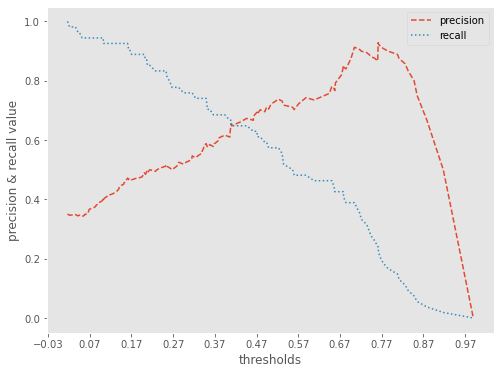

In [21]:
pred_proba_C1 = lr_clf.predict_proba(X_test)[:,1]
precision_recall_curve_plot(y_test,pred_proba_C1)

임계 값이 0.42 정도에서 정밀도와 재현율이 어느정도 균형을 맞추고 있다.

In [23]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


ㄴ> 포도당Glucose가 0 ?? 시각화를 해보자

(array([  5.,   0.,   4.,  32., 156., 211., 163.,  95.,  56.,  46.]),
 array([  0. ,  19.9,  39.8,  59.7,  79.6,  99.5, 119.4, 139.3, 159.2,
        179.1, 199. ]),
 <BarContainer object of 10 artists>)

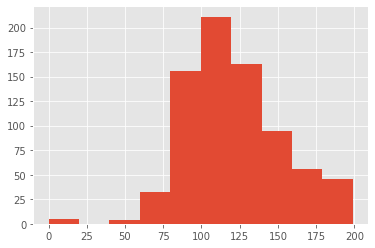

In [24]:
plt.hist(df['Glucose'])

min()값이 0으로 되어있는 피처에 대해 0값의 건수 및 전체 데이터 건수 대비 몇 퍼센트의 비율로 존재하는지 확인.

In [30]:
# 0값을 검사할 피처 명 리스트
zefo_features =['Glucose','BloodPressure','Insulin','BMI']

# 전체 데이터 건 수
total_count = df['Glucose'].count()

# 피처별로 반복하며 데이터 값이 0인 데이터 건수 추출하고 퍼센트 계산
for feature in zefo_features:
    zero_count = df[df[feature]==0][feature].count()
    print("{0} 0 건수는 {1}, 퍼센트는 {2:.2f} %".format(feature,zero_count,100*zero_count/total_count))

Glucose 0 건수는 5, 퍼센트는 0.65 %
BloodPressure 0 건수는 35, 퍼센트는 4.56 %
Insulin 0 건수는 374, 퍼센트는 48.70 %
BMI 0 건수는 11, 퍼센트는 1.43 %


In [ ]:
# zero_features 리스트 내부에 저장된 개별 피처들에 대해 0값을 평균값으로 대체